In [87]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [88]:
def misclassified(trainSet, labelSet, w):
    predictedLabel = np.sign(np.dot(trainSet, np.transpose(w)))
    predictedResult = [a == b for a,b in zip(predictedLabel, labelSet)]
    misclassifiedIndex = [index for index, value in enumerate(predictedResult) if value == False]
    return misclassifiedIndex

In [130]:
def PLA(training_set,maxIteration):
    df = training_set.copy()
    
    #add x_0 = 1, the bias 
    df['bias'] = [1] * training_set.shape[0]
    col_list = [df.columns[-1]] 
    col_list.extend(df.columns.tolist()[:-2])
    col_list.append(df.columns.tolist()[-2])
    
    df = df[col_list]
    
    pointSet = np.array(df.iloc[:,:-1])
    labelSet = np.array(df.iloc[:,-1])
    
    n = len(pointSet[0])
    w = np.zeros([1,n]) 
    counter = 0
    
    for i in xrange(maxIteration):
        misclassifiedIndex = misclassified(pointSet, labelSet, w)
        if misclassifiedIndex: 
            theChosenOne = random.choice(misclassifiedIndex)
            point = pointSet[theChosenOne].reshape(1,n)
            label = labelSet[theChosenOne].reshape(1,1)
            w = w + label*point
            counter += 1 
        else: 
            break
       
    predictedLabel = np.sign(np.dot(pointSet, np.transpose(w)))
    error_count = sum([a!=b for a,b in zip(predictedLabel, labelSet)])
    E_in = error_count/float(len(predictedLabel))
    
    print "Misclassified labels = {0}/{1}".format(error_count[0], len(predictedLabel))
    print "In sample error = {0}%".format(100.0*E_in[0])

    # Output the values
    print "Coefficient 0: " + str(w[0,1])
    print "Coefficient 1: " + str(w[0,2])
    print "Bias: " + str(w[0,0])

    # Plot the original data
    colormap = np.array(['b','b' ,'r'])
    plt.scatter(df.x, df.y, c=colormap[df.Value], s=40)
    
    # Calculate the hyperplane (decision boundary)
    ymin, ymax = plt.ylim()
    a = -w[0,1] / w[0,2]
    xx = np.linspace(ymin, ymax)
    yy = a * xx - w[0,0]/w[0,2]

    # Plot the line
    plt.plot(xx,yy, 'k-')
    plt.title("Result")
    
    return E_in, counter, w

Create data frame

In [131]:
def str_to_float(df): 
    new_df = df.copy()
    return new_df.applymap(lambda x: float(x.replace(',','.')))

In [132]:
def binary_code(df): #1 for A, -1 for B
    new_df = df.copy()
    return new_df.apply(lambda x: 1 if x == 'A' else -1)

In [133]:
df = pd.read_csv('A et B.txt', sep=' ', header=None)
df.columns = ['x','y','Value']

first_2_col = str_to_float(df.iloc[:,:-1])
value_col = binary_code(df.iloc[:,-1])
df.iloc[:,:-1] = first_2_col
df.iloc[:,-1] = value_col

df = df.iloc[np.random.permutation(len(df))].reset_index(drop=True)
df.head()

,x,y,Value
0,3.6,-0.770419,-1
1,1.6,3.2789,-1
2,3,0.0824294,1
3,3.4,-0.271965,-1
4,2.2,0.919316,1


Misclassified labels = 1/60
In sample error = 1.66666666667%
Coefficient 0: -130.4
Coefficient 1: -64.968004282
Bias: 398.0
Processing time: 0.38 minutes


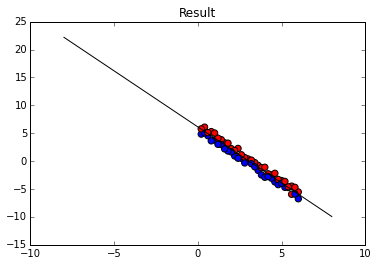

In [136]:
t0 = time.clock()
E_in, counter, w = PLA(training_set=df, maxIteration=100000)
print "Processing time: {0:.2f} minutes".format((time.clock() - t0)/60)